In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle



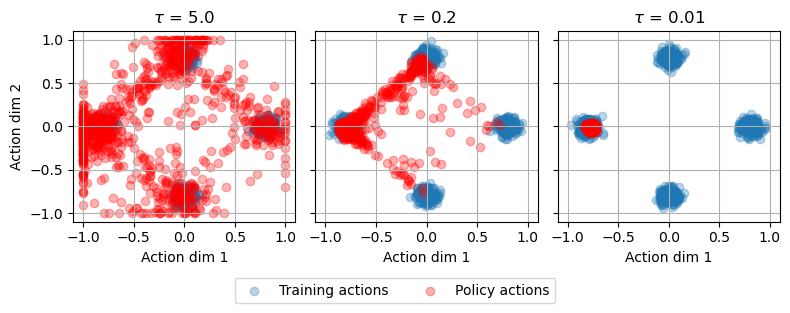

In [3]:
import pickle
import matplotlib.pyplot as plt

# Load the data
with open('../Examples/Results/mix_gaussian/EAS_data.pkl', 'rb') as f:
    EAS_data = pickle.load(f)

with open('../Examples/Results/mix_gaussian/greedy_data.pkl', 'rb') as f:
    greedy_data = pickle.load(f)

# Subplot settings
fig, axs = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)

tau_list = [5.0, 0.2, 0.01]

for i, (key, tau) in enumerate(zip(['01', '02', '03'], tau_list)):
    ax = axs[i]
    scatter_train = ax.scatter(
        EAS_data[f'train_{key}'][:, 0], EAS_data[f'train_{key}'][:, 1],
        alpha=0.3, label="Training actions"
    )
    scatter_eval = ax.scatter(
        EAS_data[f'eval_{key}'][:, 0], EAS_data[f'eval_{key}'][:, 1],
        alpha=0.3, color='red', label="Policy actions"
    )
    ax.set_title(r"$\tau$" + f" = {tau}")
    ax.set_xlabel("Action dim 1")
    if i == 0:
        ax.set_ylabel("Action dim 2")
    ax.grid(True)

# Create shared legend at the bottom
fig.legend(
    handles=[scatter_train, scatter_eval],
    labels=["Training actions", "Policy actions"],
    loc="lower center",
    ncol=2,
    frameon=True,
    bbox_to_anchor=(0.5, -0.05)
)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space for legend
#plt.show()
plt.savefig('C:/Users/Ye/Documents/YuYeh_Documents/L2S/Conference_Writing/Globecom25_workshop/Diffusion policy for intra-slice resource scheduling/Figures/fig02_mix_gaussian_example.png', dpi=300)